In [1]:
import pyscf
import pyscf.tools
import pyscf.cc
import pyscf.qmmm
from pyscf import lib
from pyscf import gto
from pyscf import df
from pyscf import scf
from pyscf import mcscf
from pyscf import grad
from pyscf.lib import logger
from pyscf.scf import RHF
import pyscf.lib
import numpy as np
import numpy
import matplotlib.pyplot as plt
angstrom=1.889725989
from numpy.linalg import inv,norm

In [2]:
NN=pyscf.gto.M(atom='N 0 0 1.1; N 0 0 0', basis='sto3G', verbose=3)
mf=RHF(NN)
mf.scf()
e_NN=mf.scf()

converged SCF energy = -107.496500511798
converged SCF energy = -107.496500511798


In [3]:
# the operators in 2nd quantiation
print(mf.get_hcore()[0])  #monoelettronic NE + kin   
print(mf.get_veff()[0])  # bielettronic operator takes as input argument (mol, dm )
print(mf.make_rdm1()[0])  # density matrix

[-2.75627018e+01 -6.35285045e+00  0.00000000e+00  0.00000000e+00
  9.38535097e-02 -3.00178430e-04 -1.39169276e+00  0.00000000e+00
  0.00000000e+00 -2.31837148e+00]
[ 1.20533259e+01  2.41964519e+00  2.32452049e-19 -1.10551653e-16
 -6.11342362e-02 -4.79474449e-04  5.24307596e-01  1.78797951e-18
 -1.23725513e-17  8.81504407e-01]
[ 2.10647611e+00 -4.26665347e-01  1.28324386e-17  3.32274739e-16
 -1.06156169e-01  1.33150500e-02  6.20895753e-03 -2.70171963e-17
 -3.01242221e-16 -1.01810643e-01]


In [4]:
#get the partial energy
print(mf.energy_elec())
print(mf.energy_nuc(),'equally',NN.energy_nuc())
print(mf.energy_tot())
print(mf.energy_elec()[0]+mf.energy_nuc())

(-131.06893990732507, 61.314080856841855)
23.572439395527272 equally 23.572439395527272
-107.4965005117978
-107.4965005117978


In [5]:
print (dir(mf))
dm=mf.make_rdm1()
h1=mf.get_hcore()
h2=mf.get_veff()
S=mf.get_ovlp()
help(mf.mo_coeff)

['CASCI', 'CASSCF', 'CCSD', 'CISD', 'DFMP2', 'DIIS', 'Gradients', 'MP2', 'QMMM', 'TDA', 'TDHF', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chkfile', '_eigh', '_eri', '_finalize', '_is_mem_enough', '_keys', '_t0', '_w0', 'analyze', 'apply', 'as_scanner', 'build', 'callback', 'canonicalize', 'check_convergence', 'check_sanity', 'chkfile', 'conv_check', 'conv_tol', 'conv_tol_grad', 'converged', 'convert_from_', 'damp', 'damp_factor', 'density_fit', 'diis', 'diis_file', 'diis_space', 'diis_space_rollback', 'diis_start_cycle', 'dip_moment', 'direct_scf', 'direct_scf_tol', 'dump_chk', 'dump_flags', 'e_tot', 'eig', 'energy_elec', 'energy_nuc', 'energy_tot', 'from_chk', 'get_fock', 'get_grad', 'g

In [6]:
# examples of contraction
print ('monoelettronic enegy = ',np.einsum('ij,ji',h1,dm))
print ('Bielettronic enegy = ',np.einsum('ij,ji',h2,dm)/2)
print ('the sum of those two equals = ',mf.energy_elec()[0])
print('Total number of electrons= ',np.einsum('ij,ji',S,dm))

monoelettronic enegy =  -192.38302076416693
Bielettronic enegy =  61.314080856841855
the sum of those two equals =  -131.06893990732507
Total number of electrons=  13.999999999999996


In [7]:
"""
| mf.get_init_guess
            | mf.get_hcore
            | mf.get_ovlp
            | mf.get_veff
            | mf.get_fock
            | mf.get_grad
            | mf.eig
            | mf.get_occ
            | mf.make_rdm1
            | mf.energy_tot
            | mf.dump_chk
"""


'\n| mf.get_init_guess\n            | mf.get_hcore\n            | mf.get_ovlp\n            | mf.get_veff\n            | mf.get_fock\n            | mf.get_grad\n            | mf.eig\n            | mf.get_occ\n            | mf.make_rdm1\n            | mf.energy_tot\n            | mf.dump_chk\n'

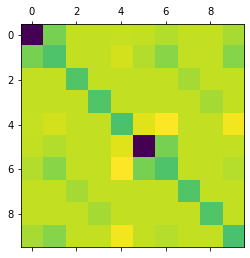

In [8]:
plt.matshow(NN.intor_symmetric('int1e_nuc'))

In [9]:
print(NN._atm)
mf.scf()

[[ 7 20  1 23  0  0]
 [ 7 24  1 27  0  0]]
converged SCF energy = -107.496500511798


-107.49650051179783

In [10]:
print(NN.nao)
print(NN._bas)
print(NN._env)
from pyscf import lib

10
[[ 0  0  3  1  0 28 31  0]
 [ 0  0  3  1  0 34 37  0]
 [ 0  1  3  1  0 40 43  0]
 [ 1  0  3  1  0 28 31  0]
 [ 1  0  3  1  0 34 37  0]
 [ 1  1  3  1  0 40 43  0]]
[137.03599968   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           2.07869874   0.           0.
   0.           0.           0.          99.106169    18.052312
   4.8856602   12.24723354  11.84499063   3.69156624   3.7804559
   0.8784966    0.2857144   -0.68474806   0.91590581   0.69124784
   3.7804559    0.8784966    0.2857144    2.39776185   1.50777694
   0.23885724]


In [11]:
#copy and paste of the qmm_charge method to obtain the delta V operator on the AO basis 

print(NN.unit)
print(NN.cart)
intor = 'int3c2e_sph'
cintopt = gto.moleintor.make_cintopt(NN._atm, NN._bas,NN._env, intor)
coords,charges=NN.atom_coords(), np.asarray([-1,1])
dv = 0
blksize = int(min(mf.max_memory*1e6/8/NN.nao**2, 200))
print(blksize)
for i0, i1 in lib.prange(0, charges.size, blksize):
    fakemol = gto.fakemol_for_charges(coords[i0:i1])
    j3c = df.incore.aux_e2(NN, fakemol, intor=intor, aosym='s2ij', cintopt=cintopt)
    dv += numpy.einsum('xk,k->x', j3c, -charges[i0:i1])

angstrom
False
200


In [12]:
dv = lib.unpack_tril(dv)
dv.shape

(10, 10)

In [13]:
np.einsum('ij,ji',dv,dm) # the first alchemical derivative is null

-1.1324274851176597e-14

In [14]:
CO=pyscf.gto.M(atom='C 0 0 1.1;O 0 0 0',basis='sto3G')
mfc=RHF(CO)
e_CO=mfc.kernel()

converged SCF energy = -111.219048454705


In [15]:
dmc=mfc.make_rdm1()
mfc.mo_occ

array([2., 2., 2., 2., 2., 2., 2., 0., 0., 0.])

In [16]:
def first_a_der(mol,charges=np.asarray([1,-1])):
    intor = 'int3c2e_sph'
    cintopt = gto.moleintor.make_cintopt(mol._atm, mol._bas, mol._env, intor)
    coords=mol.atom_coords()
    dV = 0
    blksize = int(min(mf.max_memory*1e6/8/mol.nao**2, 200))
    for i0, i1 in lib.prange(0, charges.size, blksize):
        fakemol = gto.fakemol_for_charges(coords[i0:i1])
        j3c = df.incore.aux_e2(mol, fakemol, intor=intor, aosym='s2ij', cintopt=cintopt)
        dV += numpy.einsum('xk,k->x', j3c, -charges[i0:i1])
    dV = lib.unpack_tril(dV)
    return dV


In [17]:
dV_CO=first_a_der(CO)

In [18]:
np.einsum('ij,ji',first_a_der(CO),dmc)

6.340187073203947

In [144]:
def dens_dh(mol,dh):
    deltaZ = np.array((dh,-dh))
    mf = pyscf.qmmm.mm_charge(pyscf.scf.RHF(mol), mol.atom_coords()/angstrom, deltaZ)
    class NoSelfQMMM(mf.__class__):
        def energy_nuc(self):
            e_nuc=self.mol.energy_nuc()
            e_nuc=dh**2/np.linalg.norm(self.mol.atom_coords()[0]-self.mol.atom_coords()[1])
            return e_nuc
    mf = NoSelfQMMM()
    en=mf.scf()
    return mf.make_rdm1(),en

In [83]:
dms=[dens_dh(CO,dh)[0] for dh in [-.2,-.1,0,.1,.2]]

converged SCF energy = -112.545650949194
converged SCF energy = -111.867785597183
converged SCF energy = -111.219048454705
converged SCF energy = -110.599886208879
converged SCF energy = -110.010681190845


In [23]:
e_NN_at_CO=dens_dh(CO,1)[1]
print ('the alchemical shift brings to dE =  ',e_NN_at_CO-e_CO)

converged SCF energy = -106.405205737936
the alchemical shift brings to dE =   4.8138427167695


In [24]:
dVNN=-1/(1.1*angstrom)
dE1=np.einsum('ij,ji',dms[2],dV_CO)
print ('first order alchemy correction = ', dVNN+dE1)
dRho1=(dms[3]-dms[1])/2/.1
dE2=np.einsum('ij,ji',dRho1,dV_CO)/2
print ('second order alchemy correction = ', dVNN+dE1+dE2)
dRho2=(dms[3]-2*dms[2]+dms[1])/.01
dE3=np.einsum('ij,ji',dRho2,dV_CO)/6
print ('third order alchemy correction = ', dVNN+dE1+dE2+dE3)
dRho3=(dms[4]*0.5-dms[3]+dms[1]-dms[0]*0.5)/.001
dE4=np.einsum('ij,ji',dRho3,dV_CO)/24
print ('fourth order alchemy correction = ', dVNN+dE1+dE2+dE3+dE4)
dRho4=(dms[4]-4*dms[3]+6*dms[2]-4*dms[1]+dms[0])/.0001
dE5=np.einsum('ij,ji',dRho4,dV_CO)/120
print ('fifth order alchemy correction = ', dVNN+dE1+dE2+dE3+dE4+dE5)
print ('Error due to alchemy = ', e_NN_at_CO-e_CO-(dVNN+dE1+dE2+dE3+dE4+dE5) )
print ('Error due to basis set (sto3g) = ', e_NN_at_CO-e_NN )

print(dE1,dE2,dE3,dE4,dE5)

first order alchemy correction =  5.859116846947351
second order alchemy correction =  4.861713665576192
third order alchemy correction =  4.79273088341423
fourth order alchemy correction =  4.819434471856313
fifth order alchemy correction =  4.8161239956039
Error due to alchemy =  -0.0022812788343999912
Error due to basis set (sto3g) =  1.0912947738619465
6.340187073203793 -0.9974031813711586 -0.06898278216196156 0.026703588442083398 -0.0033104762524132155


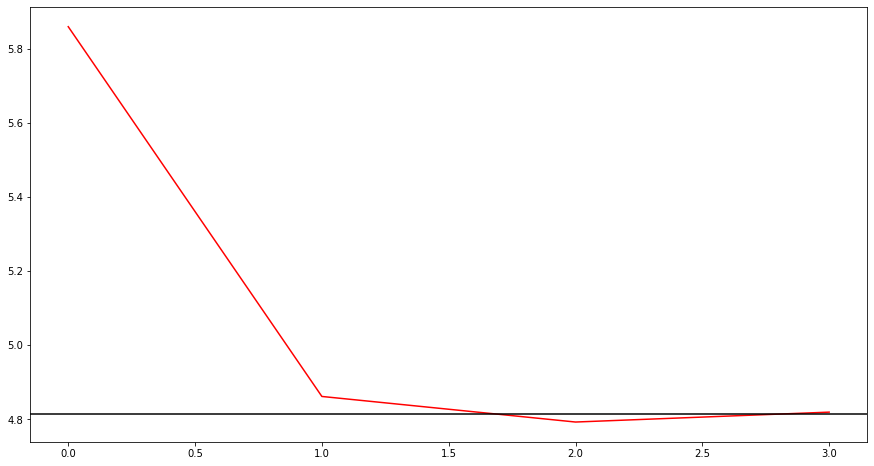

In [25]:
figure=plt.figure(figsize=(15,8))
figure.set_animated(True)
plt.plot([dVNN+dE1,dVNN+dE1+dE2,dVNN+dE1+dE2+dE3,dVNN+dE1+dE2+dE3+dE4],color='red')
plt.axhline(e_NN_at_CO-e_CO,color='black')

3 mHa of error + error due to basis set,
In order to get a better precision the coefficient of the finite difference scheme can follow the table: https://en.wikipedia.org/wiki/Finite_difference_coefficient , in which expecially the fist and the second dervtive can b taken exact up to $dh^4$

In [26]:
# for a five point scheme 
coeff5p=np.asarray([[1/12,-2/3,0,2/3,-1/12],[-1/12,4/3,-5/2,4/3,-1/12],[-1/2,1,0,-1,1/2],[1,-4,6,-4,1]])
dms_array=np.asarray(dms)

In [27]:
dVNN=-1/(1.1*angstrom)
dE1=np.einsum('ij,ji',dms[2],dV_CO)
print ('first order alchemy correction = ', dVNN+dE1)
print ('Error due to alchemy = ', e_NN_at_CO-e_CO-(dVNN+dE1) )
dRho1=0
for i in range(5):
    dRho1+=dms_array[i]*coeff5p[0][i]
dRho1/=.1
dE2=np.einsum('ij,ji',dRho1,dV_CO)/2
print ('second order alchemy correction = ', dVNN+dE1+dE2)
print ('Error due to alchemy = ', e_NN_at_CO-e_CO-(dVNN+dE1+dE2) )
dRho2=0
for i in range(5):
    dRho2+=dms_array[i]*coeff5p[1][i]
dRho2/=.01
dE3=np.einsum('ij,ji',dRho2,dV_CO)/6
print ('third order alchemy correction = ', dVNN+dE1+dE2+dE3)
print ('Error due to alchemy = ', e_NN_at_CO-e_CO-(dVNN+dE1+dE2+dE3) )
dRho3=(dms[4]*0.5-dms[3]+dms[1]-dms[0]*0.5)/.001
dE4=np.einsum('ij,ji',dRho3,dV_CO)/24
print ('fourth order alchemy correction = ', dVNN+dE1+dE2+dE3+dE4)
print ('Error due to alchemy = ', e_NN_at_CO-e_CO-(dVNN+dE1+dE2+dE3+dE4) )
dRho4=(dms[4]-4*dms[3]+6*dms[2]-4*dms[1]+dms[0])/.0001
dE5=np.einsum('ij,ji',dRho4,dV_CO)/120
print ('fifth order alchemy correction = ', dVNN+dE1+dE2+dE3+dE4+dE5)
print ('Error due to alchemy = ', e_NN_at_CO-e_CO-(dVNN+dE1+dE2+dE3+dE4+dE5) )
print ('Error due to basis set (sto3g) = ', e_NN_at_CO-e_NN )
print(dVNN,dE1,dE2,dE3,dE4,dE5) 
#notice that now the error in alchemy is the same order of magnitude of dE5 

first order alchemy correction =  5.859116846947351
Error due to alchemy =  -1.0452741301778508
second order alchemy correction =  4.8611795938073525
Error due to alchemy =  -0.04733687703785261
third order alchemy correction =  4.792251986249441
Error due to alchemy =  0.02159073052005933
fourth order alchemy correction =  4.818955574691524
Error due to alchemy =  -0.00511285792202365
fifth order alchemy correction =  4.81564509843911
Error due to alchemy =  -0.0018023816696102202
Error due to basis set (sto3g) =  1.0912947738619465
-0.48107022625644225 6.340187073203793 -0.9979372531399979 -0.06892760755791232 0.026703588442083398 -0.0033104762524132155


In [28]:
#for further processesdms[2]
NN=pyscf.gto.M(atom='N 0 0 1.1; N 0 0 0', basis='sto3G', verbose=3)
mf2=RHF(NN)
mf2.mo_occ=mfc.mo_occ
mf2.mo_coeff=dms[2]
mf2.energy_tot()
#print(mf2.get_veff(NN,dms[2].copy())[0])  # bielettronic operator takes as input argument (mol, dm )
#print(mf2.make_rdm1()[0])  # density matrix

-84.49272856213925

In [167]:
# density  matrices difference NN and NN@CO   sto3g basis
NN=pyscf.gto.M(atom='N 0 0 1.1; N 0 0 0', basis='sto3G', verbose=3)
CO=pyscf.gto.M(atom='C 0 0 1.1; O 0 0 0', basis='sto3G', verbose=3)
nnhf=RHF(NN)
cohf=RHF(CO)
nnhf.kernel()
nndm=nnhf.make_rdm1()
nndmco=dens_dh(CO,1)[0]
#np.linalg.norm(nndmco-nndm)
#plt.matshow(nndmco)
#plt.matshow(nndm)

converged SCF energy = -107.496500511798
converged SCF energy = -106.405205347568


In [168]:
h1=nnhf.get_hcore()
S=nnhf.get_ovlp()
h2=nnhf.get_veff(dm=nndm)

mee=np.einsum('ij,ji',h1,nndm)
bee=np.einsum('ij,ji',h2,nndm)/2
print ('monoelettronic enegy = ',mee)
print ('Bielettronic enegy = ',bee)
print('Total energy = ', nnhf.kernel(),mee+bee+nnhf.energy_nuc())

monoelettronic enegy =  -192.38302076416701
Bielettronic enegy =  61.31408085684191
converged SCF energy = -107.496500511798
Total energy =  -107.49650051179783 -107.49650051179783


In [169]:
h1=nnhf.get_hcore()
Sn=nnhf.get_ovlp()
num_e=np.einsum('ij,ji',Sn,nndmco)
print ('difference in num_electrons=',num_e)
nndmco*=14/num_e
h2=nnhf.get_veff(dm=nndmco)
mee=np.einsum('ij,ji',h1,nndmco)
bee=np.einsum('ij,ji',h2,nndmco)/2

print ('monoelettronic enegy = ',mee)
print ('Bielettronic enegy = ',bee)
"""
h2=nnhf.get_veff(dm=nndm)
mee=np.einsum('ij,ji',h1,nndm)
bee=np.einsum('ij,ji',h2,nndm)/2
print ('monoelettronic enegy = ',mee)
print ('Bielettronic enegy = ',bee)
"""
print('Total energy = ', nnhf.kernel(),mee+bee+nnhf.energy_nuc())

difference in num_electrons= 14.088395152384477
monoelettronic enegy =  -191.74535650951344
Bielettronic enegy =  61.265671478087434
converged SCF energy = -107.496500511798
Total energy =  -107.49650051179783 -106.90724563589875


converged SCF energy = -106.405205347568
2.414944432662499e-16


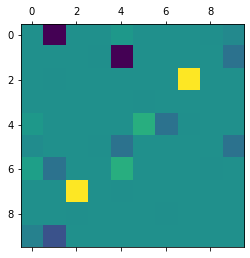

In [170]:
Pc2=dens_dh(CO,1)[0]
for i in range(1000):
    Pc2*=14/np.einsum('ij,ji',Sn,Pc2)
    dP=inv(np.eye(10)-Pc2.dot(Sn)).dot(Pc2.dot(Sn.dot(Pc2))/2-Pc2)/2 
    Pc2=Pc2+dP
Pc3=Pc2.copy()
Pc3=Pc3*14/np.einsum('ij,ji',S,Pc3)
plt.matshow(np.dot(Pc3,np.dot(S,Pc3))/2-Pc3)
print(norm(np.dot(Pc3,np.dot(S,Pc3))/2-Pc3))

In [171]:
nndmco=Pc3
h1=nnhf.get_hcore()
S=nnhf.get_ovlp()
num_e=np.einsum('ij,ji',S,nndmco)
print ('difference in num_electrons=',num_e)
nndmco*=14/num_e
h2=nnhf.get_veff(dm=nndmco)
mee=np.einsum('ij,ji',h1,nndmco)
bee=np.einsum('ij,ji',h2,nndmco)/2

print ('monoelettronic enegy = ',mee)
print ('Bielettronic enegy = ',bee)
print('Total energy = ', nnhf.kernel(),mee+bee+nnhf.energy_nuc())
print(np.linalg.eig(Pc3.dot(S)))

difference in num_electrons= 14.0
monoelettronic enegy =  -192.1874160810085
Bielettronic enegy =  61.32683051913368
converged SCF energy = -107.496500511798
Total energy =  -107.4965005117978 -107.28814616634754
(array([-2.22044605e-16,  2.00000000e+00,  2.00000000e+00,  1.25210730e-16,
       -2.72545335e-16,  2.00000000e+00,  2.00000000e+00,  2.00000000e+00,
        2.00000000e+00,  2.00000000e+00]), array([[-4.31641464e-02,  9.99622158e-01, -4.29934264e-02,
         4.29899575e-03,  2.94734088e-02,  1.50667692e-02,
        -3.29765455e-02,  1.03957763e-02, -4.66313885e-02,
         8.92692717e-02],
       [ 4.94021181e-01, -1.35918802e-02, -9.69527389e-01,
        -4.92027558e-02, -3.37328302e-01, -9.91521052e-02,
         5.57934168e-02,  4.06183979e-01, -1.80715561e-01,
         3.02402130e-01],
       [-1.35434969e-17,  3.72618815e-19, -1.97730005e-16,
        -2.24010439e-01,  3.52784991e-01, -5.11858926e-01,
        -1.78629257e-01,  7.39240084e-02,  2.94317409e-01,
        -5

0.12374842385148677 0.12374842385148677


(0.1619178278555804, 0.1619178278555804)

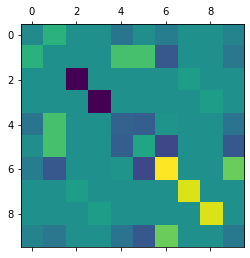

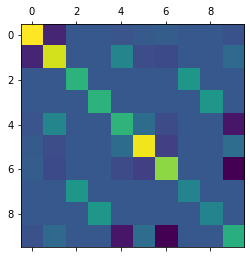

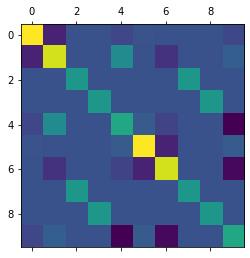

In [108]:
plt.matshow(nndm-nndmco)
plt.matshow(nndmco)
plt.matshow(nndm)
print((nndm-nndmco)[1][4],(nndm-nndmco)[4][1])
(nndm-nndmco)[9][6],(nndm-nndmco)[6][9]

# Try with def2-TZVP

In [172]:
NN=pyscf.gto.M(atom='N 0 0 0; N 0 0 1.1', basis='def2-TZVP', verbose=3)
CO=pyscf.gto.M(atom='C 0 0 0; O 0 0 1.1', basis='def2-TZVP', verbose=3)
nnhf=RHF(NN)
nnhf.kernel()

converged SCF energy = -108.9876382454


-108.98763824539968

In [176]:
Sn=nnhf.get_ovlp()
Pd=dens_dh(CO,1)[0]
for i in range(1000):
    Pd*=14/np.einsum('ij,ji',Sn,Pd)
    dP=inv(np.eye(62)-Pd.dot(Sn)).dot(Pd.dot(Sn.dot(Pd))/2-Pd)/2 
    Pd=Pd+dP
print(norm(np.dot(Pd,np.dot(Sn,Pd))/2-Pd))

converged SCF energy = -109.856025220839
5.643328056401917e-16


In [177]:
nndmco=Pd
h1=nnhf.get_hcore()
Sn=nnhf.get_ovlp()
num_e=np.einsum('ij,ji',Sn,nndmco)
print ('difference in num_electrons=',num_e)
h2=nnhf.get_veff(dm=nndmco)
mee=np.einsum('ij,ji',h1,nndmco)
bee=np.einsum('ij,ji',h2,nndmco)/2

print ('monoelettronic enegy = ',mee)
print ('Bielettronic enegy = ',bee)
print('Total energy = ', nnhf.kernel(),mee+bee+nnhf.energy_nuc())

difference in num_electrons= 14.0
monoelettronic enegy =  -192.84759142634238
Bielettronic enegy =  63.428446307073436
converged SCF energy = -108.9876382454
Total energy =  -108.98763824539954 -105.84670572374166
